In [1]:
import pandas as pd
import numpy as np
import nltk
import pymorphy2
from nltk.corpus import stopwords
import re

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)
data = pd.read_csv("tg_data.csv")

data.head()

,Message,channel_name
0,"Столичные аэропорты работают штатно в условиях снегопадаСтоличные аэропорты работают штатно в условиях снегопада. Об этом сообщаетAVIA.RUсо ссылкой на даныне Росавиации.""Аэропорты московского региона (Шереметьево, Домодедово, Внуково и Жуковский) на 16:30 МСК работают штатно, отмен рейсов по метеоусловиям и уходов самолетов на запасные аэродромы нет"", — отмечается в сообщении.Службы аэропортов оснащены всеми необходимыми силами и средствами для работы в условиях непогоды.aviaru.net/n271116",@aviaru_news
1,"Utair перевез миллионного пассажира международного аэропорта ""Сургут""25 июля на рейсе UT483 авиакомпании Utair из Сургута в Махачкалу улетел миллионный пассажир Международного аэропорта «Сургут» в 2019 году. Сотрудники Utair и аэропорта торжественно встретили путешественника. Авиакомпания вручила сертификат на бесплатный перелет туда-обратно по любому направлению Utair, а аэропорт — сертификатом Priority Pass на годовое обслуживание в бизнес-зале аэропорта «Сургут».aex.ru/n200035",@aviaru_news
2,"Аэропорт Казани возобновил работу после сообщения о ""минировании""Международный аэропорт ""Казань"" возобновил работу после проверки информации о заложенном на борту самолета взрывном устройстве. Об этом в понедельник сообщили в пресс-службе аэропорта.aex.ru/n197259",@aviaru_news
3,"Летчик-испытатель ГСС Александр Иванов назвал сгоревший в ""Шереметьево"" самолет SSJ 100 неуправляемымБывший летчик-испытатель самолета SuperJet 100 (SSJ 100) Александр Иванов рассказал, что сгоревший в мае 2019 года в «Шереметьево» самолет стал неуправляемым еще в воздухе, после удара молнии.aex.ru/n212829",@aviaru_news
4,"Российский противопожарный самолет Бе-200 показал эффективность в тушении пожаров в ГрецииРоссийский самолет-амфибия Бе-200ЧС, разработанный ПАО ""ТАНТК им. Г.М. Бериева"", показал свою эффективность в тушении пожаров в различных районах Греции. Такое мнение выражает в четверг греческий сайтMilitaire.gr, специализирующийся на новостях о военной технике и оборонной тематике. Об этом пишет ТАСС.Российский противопожарный самолет Бе-200 [в Греции его называют просто ""Бериев""] демонстрирует, что он - самое надежное решение для борьбы с многочисленными пожарами, которые ежедневно угрожают жилым районам Греции, говорится в сообщении. ""В течение многих лет использование российского противопожарного самолета было темой обсуждения в Греции, и у многих были сомнения по поводу того, может ли он работать в Греции. Как видно из его действий до сих пор, он может"", - добавляет сайт.aviaru.net/n232782",@aviaru_news


In [2]:
data.channel_name.value_counts()

channel_name
@aviaru_news    58433
@anrbc           3657
@telerzd         2953
Name: count, dtype: int64

In [3]:
df = data.drop_duplicates().reset_index(drop=True)

In [4]:
df = df.groupby('channel_name', group_keys= False).apply(lambda x: x.sample(2950, random_state=42))
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.channel_name.value_counts()

C:\Users\leova\AppData\Local\Temp\ipykernel_12704\343788147.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('channel_name', group_keys= False).apply(lambda x: x.sample(2950, random_state=42))


channel_name
@telerzd        2950
@aviaru_news    2950
@anrbc          2950
Name: count, dtype: int64

In [5]:
df.head()

,Message,channel_name
0,Лучшие из лучших определятся в честной борьбе👷‍♂️👷‍♀️ В Екатеринбурге проходит финал Чемпионата профессионалов РЖД.👷‍♂️👷‍♀️ Две тысячи участников соревнуются более чем по 40 компетенциям. Среди них:✔️ управление локомотивом;✔️ маневровая работа на железнодорожном транспорте;✔️ управление вокзальным комплексом;✔️ техническое обслуживание и ремонт вагонов;✔️ охрана труда.⚡️ Наиболее яркие моменты в нашем видео,@telerzd
1,ГТЛК подписала несколько договоров и соглашений по лизингу вертолетов17 мая 2019 года состоялась церемония подписания договоров лизинга и соглашений между ПАО «ГТЛК» и российскими авиакомпаниями.aex.ru/n197547,@aviaru_news
2,"Мария Захарова: Россия надеется на неполитизированную оценку ICAO инцидента с самолетом RyanairРоссия рассчитывает, что Международная организация гражданской авиации (ICAO) проведет профессиональное и неполитизированное расследование инцидента с воздушным судном ирландской авиакомпании Ryanair в небе над Белоруссией. Об этом заявила в пятницу на брифинге официальный представитель МИД РФ Мария Захарова, пишет ТАСС.После инцидента с самолетом Ryanair саммит Евросоюза постановил запретить белорусским авиакомпаниям осуществлять рейсы в аэропорты ЕС и совершать полеты над территорией Евросоюза, а также рекомендовал европейским перевозчикам отказаться от полетов в воздушном пространстве Белоруссии. Более 20 стран закрыли свое воздушное пространство для белорусского авиаперевозчика.aviaru.net/n231570",@aviaru_news
3,"РЖД и FESCO запускают перевозочный смарт-контракт💻 Завершили подключение информационных систем FESCO к платформе РЖД. Таким образом, дан старт цифрового взаимодействия в процессе грузовых перевозок на пилотном маршруте Владивостокский морской торговый порт – станция Санкт-Петербург-Финляндский.💡Сервис по использованию смарт-контрактов обеспечивает договорное сопровождение основных операций транспортно-логистической деятельности и возникающих взаиморасчетов между участниками перевозочного процесса.🚂 Следующим маршрутом станет Владивостокский морской торговый порт – станция Силикатная (Московская область).🤝 Напомним, соглашение о сотрудничестве в области реализации сервиса смарт-контрактов в рамках ПМЭФ-2021 подписали генеральный директор – председатель правления ОАО «РЖД» Олег Белозёров и президент FESCO Аркадий Коростелёв.",@telerzd
4,"Joby Aviation запустит ""летающее такси"" в Дубае в начале 2026 годаТранспортная компания Joby Aviation запустит ""летающее такси"" для перевозок жителей Дубая в начале 2026 года. Об этом сообщает ТАСС со ссылкой на газету Khaleej Times (KT).Как отмечается, Joby Aviation подписала соглашение с Управлением дорог и транспорта Дубая, согласно которому авиационные перевозки по городу начнутся через два года. ""Скорость ""летающего такси"" составит до 320 км/ч, что гарантирует тишину и приватность жителей Дубая"", — заявил основатель авиационной компании Джобен Бевирт.Компания ранее проводила совместный эксперимент с Национальным управлением по аэронавтике и исследованию космического пространства США (NASA), который показал, что при полете небольшого транспортного средства на высоте около 500 м шум от него ""оказался тише обычного разговора"", отмечает газета.aviaru.net/n267500",@aviaru_news


In [6]:
nltk.download('wordnet')
nltk.download('stopwords')

def pymorphy2_311_hotfix():
    from inspect import getfullargspec
    from pymorphy2.units.base import BaseAnalyzerUnit

    def _get_param_names_311(klass):
        if klass.__init__ is object.__init__:
            return []
        args = getfullargspec(klass.__init__).args
        return sorted(args[1:])

    setattr(BaseAnalyzerUnit, '_get_param_names', _get_param_names_311)

pymorphy2_311_hotfix()
lemma = pymorphy2.MorphAnalyzer()
stop_words = set(stopwords.words('russian'))

def lemmatize(t):
    a = t.split()
    res = [lemma.parse(x)[0].normal_form for x in a]
    return ' '.join(res)

def only_letters(t):
    t = re.sub(r'[^\w\s]', ' ', t)
    t = re.sub(r'\d', '', t)
    return t

def removing(t):
    a = t.split()
    res = [x for x in a if x.lower() not in stop_words]
    return ' '.join(res)

df['Message'] = df['Message'].apply(lambda x: lemmatize(str(x).lower()))
df['Message'] = df['Message'].apply(only_letters)
df['Message'] = df['Message'].apply(removing)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leova\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leova\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Message,channel_name
0,хороший хороший определиться честной борьбе екатеринбург проходить финал чемпионат профессионал ржд тысяча участник соревноваться компетенциям среди управление локомотивом маневровый работа железнодорожный транспорте управление вокзальный комплексом технический обслуживание ремонт вагонов охрана труда наиболее яркий момент наш видео,@telerzd
1,гтлк подписать несколько договор соглашение лизинг вертолетов май год состояться церемония подписание договор лизинг соглашение пао гтлк российский авиакомпаниями aex ru n,@aviaru_news
2,мария захарова россия надеяться неполитизировать оценка icao инцидент самолёт ryanairроссия рассчитывает международный организация гражданский авиация icao провести профессиональный неполитизировать расследование инцидент воздушный судный ирландский авиакомпания ryanair небо белоруссией это заявить пятница брифинг официальный представитель мид рф мария захарова писать тасс инцидент самолёт ryanair саммит евросоюз постановить запретить белорусский авиакомпания осуществлять рейс аэропорт ес совершать полёт территория евросоюза также рекомендовать европейский перевозчик отказаться полёт воздушный пространство белоруссии страна закрыть свой воздушный пространство белорусский авиаперевозчика aviaru net n,@aviaru_news
3,ржд fesco запускать перевозочный смарт контракт завершить подключение информационный система fesco платформа ржд образом дать старт цифровой взаимодействие процесс грузовой перевозка пилотный маршрут владивостокский морской торговый порт станция санкт петербург финляндский сервис использование смарта контракт обеспечивать договорный сопровождение основный операция транспортно логистический деятельность возникать взаиморасчёт участник перевозочный процесса следующий маршрут стать владивостокский морской торговый порт станция силикатный московский область напомним соглашение сотрудничество область реализация сервис смарта контракт рамка пмэф подписать генеральный директор председатель правление оао ржд олег белозёр президент fesco аркадий коростелёв,@telerzd
4,joby aviation запустить летать такси дубай начало годатранспортный компания joby aviation запустить летать такси перевозка житель дубай начало года это сообщать тасс ссылка газета khaleej times kt отмечается joby aviation подписать соглашение управление дорога транспорт дубая согласно который авиационный перевозка город начаться года скорость летать такси составить км ч гарантировать тишина приватность житель дубая заявить основатель авиационный компания джобен бевирт компания ранее проводить совместный эксперимент национальный управление аэронавтика исследование космический пространство сша nasa который показал полёт небольшой транспортный средство высота около м шум оказаться тихий обычный разговора отмечать газета aviaru net n,@aviaru_news


In [7]:
df.channel_name.value_counts()

channel_name
@telerzd        2950
@aviaru_news    2950
@anrbc          2950
Name: count, dtype: int64

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.7089 - loss: 0.7023 - val_accuracy: 0.9932 - val_loss: 0.0256
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.9965 - loss: 0.0155 - val_accuracy: 0.9887 - val_loss: 0.0294
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.9993 - loss: 0.0082 - val_accuracy: 0.9955 - val_loss: 0.0161
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.9940 - val_loss: 0.0220
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9995 - loss: 0.0056 - val_accuracy: 0.9955 - val_loss: 0.0170
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 1.0000 - loss: 2.3344e-04 - val_accuracy: 0.9955 - val_loss: 0.0192
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 1.0000 - loss: 1.2549e-04 - val_accuracy: 0.9955 - val_loss: 0.0188
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9971 - loss: 0.0150
Test Accuracy: 99.64%
70/70 

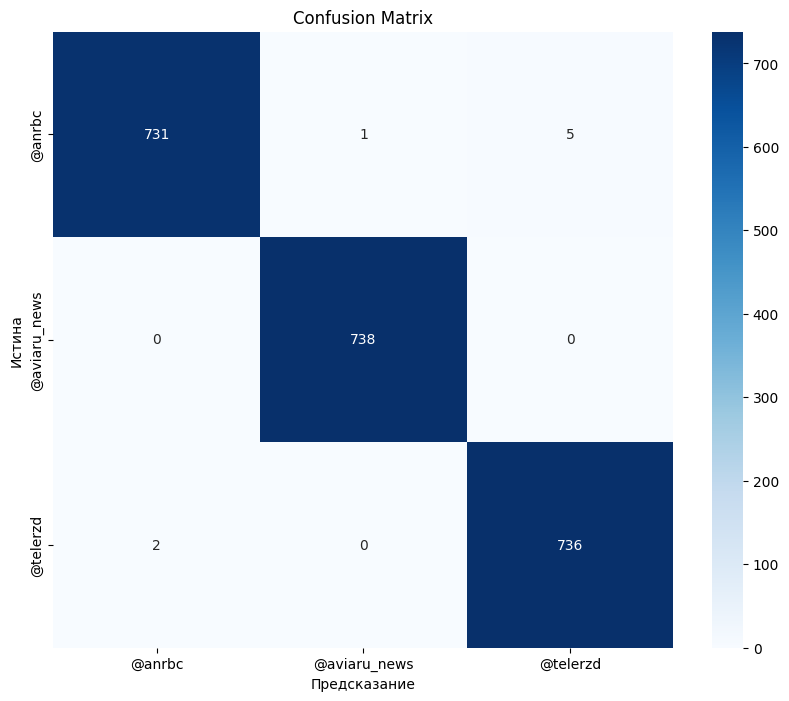

              precision    recall  f1-score   support

      @anrbc       1.00      0.99      0.99       737
@aviaru_news       1.00      1.00      1.00       738
    @telerzd       0.99      1.00      1.00       738

    accuracy                           1.00      2213
   macro avg       1.00      1.00      1.00      2213
weighted avg       1.00      1.00      1.00      2213



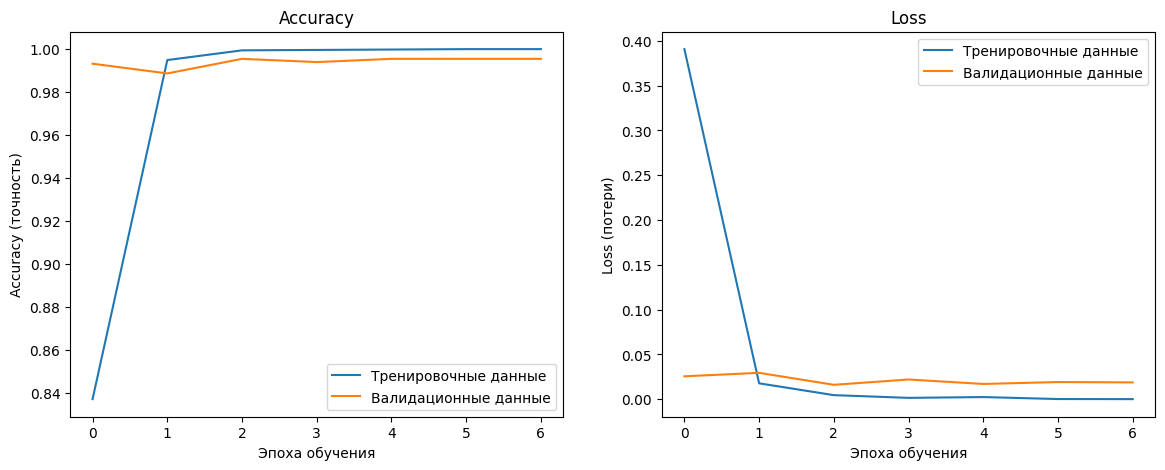

Переданный на вход пост: участие российский железнодорожник восстановить движение поезд размытый участок железный дорога армения сегодня мск участок айрум санаин республика армения открыто движение поездов прервать https t me telerzd май наводнение размыв пути работа восстановление инфраструктура вестись соответствие поручение президент рф владимир путина ть результат наводнение повредить метр железнодорожный полотна опора контактный сети нарушить энергоснабжение работа средство железнодорожный автоматики приостановить движение поезд сообщение грузией участие российский железнодорожник детально обследовать всё повреждения определить технология работа потребный количество материал аварийно восстановительный работ восстановить земляной полотно верхний строение путь энергоснабжение ть ржд действовать оперативный штаб руководство глава компания олег белозёрова благодаря опережать темп работ который вестись круглосуточный режиме открыть движение удаться неделя раньше планировалось
31/31 ━━━

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report


texts = df['Message'].astype(str).values
labels = df['channel_name'].astype(str).values

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(texts, labels_encoded, test_size=0.25, stratify=labels_encoded, random_state=42)

max_words = 20000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

model = Sequential()
model.add(Embedding(max_words, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=4, restore_best_weights=True)

history = model.fit(X_train_pad, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

y_pred = model.predict(X_test_pad)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Предсказание')
plt.ylabel('Истина')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Тренировочные данные')
plt.plot(history.history['val_accuracy'], label='Валидационные данные')
plt.xlabel('Эпоха обучения')
plt.ylabel('Accuracy (точность)')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Тренировочные данные')
plt.plot(history.history['val_loss'], label='Валидационные данные')
plt.xlabel('Эпоха обучения')
plt.ylabel('Loss (потери)')
plt.legend()
plt.title('Loss')

plt.show()
new_text = "С участием российских железнодорожников восстановлено движение поездов на размытом участке железной дороги Армении ⏰ Сегодня в 12:30 мск на участке Айрум – Санаин (Республика Армения) открыто движение поездов, прерванное (https://t.me/telerzd/4901) 25 мая из-за наводнения и размыва пути.Работы по восстановлению  инфраструктуры ведутся в соответствии с поручением Президента РФ Владимира Путина.В результате наводнения было повреждено 1800 метров железнодорожного полотна, 45 опор контактной сети, нарушено энергоснабжение и работа средств железнодорожной автоматики. Приостановлено движение поездов в сообщении с Грузией.🚧 С участием российских железнодорожников детально обследованы все повреждения, определена технология работ и потребное количество материалов для аварийно-восстановительных работ, восстановлено земляное полотно, верхнее строение пути и энергоснабжение.В РЖД действует оперативный штаб под руководством главы компании Олега Белозёрова.👍 Благодаря опережающему темпу работ, которые велись в круглосуточном режиме, открыть движение удалось почти на неделю раньше, чем планировалось."
prepared_new_text = removing(only_letters(lemmatize(new_text)))
print(f'Переданный на вход пост: {prepared_new_text}')
new_text_seq = tokenizer.texts_to_sequences(prepared_new_text)
new_text_pad = pad_sequences(new_text_seq, maxlen=max_len)
predicted = model.predict(new_text_pad)
predicted_class = label_encoder.inverse_transform([predicted.argmax(axis=1)[0]])

print(f'Предсказанный тг канал: {predicted_class[0]}')
